# Reminders 

$\hat p$ : Sample population proportion.<br>
$\bar{x}$: Sample mean.<br>
$ p $ : Population proportion. <br>
$ u $ : Population Mean.


**Sample means** are used to estimate the **Population Mean**.<br> _Example_ : $\bar{x}$ is the average weight of a **sample of 100** middle-aged females. It can be used to estimate the average weight $ u $ of **all** middle-aged females.

**Sample proportion** is to be used to estimate the **Population Proportion**.  Proportion are values between 0 and 1:  $ 0 < p < 1 $. <br>
$\hat{p}$ the proportion, in a **sample of 1000 citizens**, to approve the gov's policy. $\hat{p}$ can be used to estimate $p$ the proportion of **all** likely citizens to approve the gov's policy. 

**Standard Deviation** = $\sigma= \sqrt(\frac{\sum(x_i-\bar x)²}{N})$<br>
$x_i$ : Each value from the population. <br>
$\bar x$ : The population mean. <br>
$ N$ : The size of the population. <br>

**Standard Error for the mean** = $\frac{\sigma}{\sqrt n}$ <br>
$n$: Number of samples. 

**Standard Error for Proportion** = $\sqrt \frac {p (1 - p)} {n}  $

**Confidence Intervals** = $ \bar x \pm z \frac{\sigma}{\sqrt n}$

# Assignment

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

In [31]:
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [66]:
metrics=pd.DataFrame()
metrics['mean']=df.mean(axis=1)
metrics['sem']=df.sem(axis=1)

z=1.96

metrics["CI_lower"]= metrics["mean"]-z*metrics["sem"]
metrics["CI_upper"]= metrics["mean"]+z*metrics["sem"]
metrics["CI"]=metrics["CI_upper"]-metrics["CI_lower"]

In [67]:
metrics

,mean,sem,CI_lower,CI_upper,CI
1992,33312.107476,3320.866311,26803.209506,39821.005446,13017.795940
1993,41861.859541,1628.701180,38669.605227,45054.113855,6384.508627
1994,39493.304941,2323.419534,34939.402654,44047.207228,9107.804574
1995,47743.550969,1155.026400,45479.699225,50007.402714,4527.703489


<IPython.core.display.Javascript object>


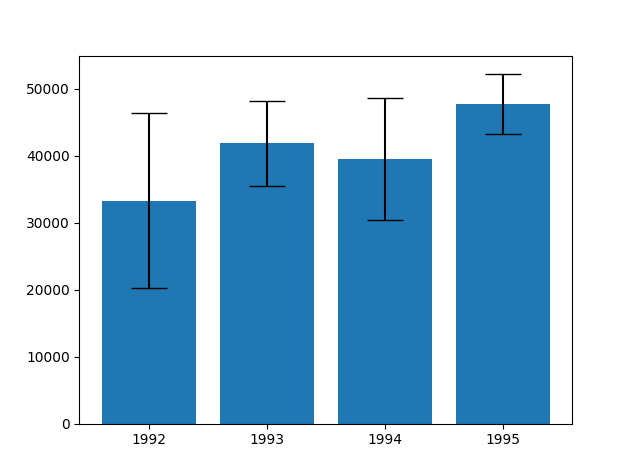

([<matplotlib.axis.XTick at 0x1c80f9315c8>,
 <a list of 4 Text xticklabel objects>)

In [68]:
Y=metrics['mean'].values
Xvals= np.arange(len(Y))
X = ["1992","1993","1994","1995"]
ci=df2['CI'].values

plt.figure()
plt.bar(Xvals, Y, yerr=ci, capsize= 13)
plt.xticks(Xvals, X)